# Generate Report Results

### 1. 读取3组5台模拟钟组数据，分别为无相关，有3个（135）相关，全相关

In [20]:
# 1. Read data with 0 covariance and 5 covariance
import numpy as np
cov_0_dir = "0-cov.csv"
cov_5_dir = "5-cov.csv"
cov_0_data = np.loadtxt(cov_0_dir, delimiter=',')
cov_5_data = np.loadtxt(cov_5_dir, delimiter=',')
print(cov_0_data)
print(cov_0_data.shape)
print("----------------------------------------")
print(cov_5_data)
print(cov_5_data.shape)

[[-7.45264096e-14  6.92921407e-14  5.75335554e-14 ...  2.01092351e-14
   2.36194597e-14 -8.38431775e-15]
 [ 1.36947343e-14 -4.09681576e-14  5.36832118e-14 ...  1.56012905e-14
  -1.34993118e-13 -4.84806770e-15]
 [ 3.37326932e-14 -1.08973254e-15 -2.87413333e-14 ... -5.45730278e-15
   1.18754804e-13  5.03894506e-14]
 [ 6.08968914e-14  5.74268368e-14 -2.31710283e-14 ... -2.84925176e-13
  -1.37184415e-13 -2.24295503e-13]
 [ 9.11290304e-15  4.21096512e-14 -2.96167899e-14 ... -9.76053278e-14
   3.58316385e-14  3.70323843e-14]]
(5, 2591999)
----------------------------------------
[[-7.52055820e-14  6.82411419e-14  5.61391454e-14 ...  2.10127244e-14
   2.41325684e-14 -8.27168791e-15]
 [ 1.30155620e-14 -4.20191564e-14  5.22888018e-14 ...  1.65047799e-14
  -1.34480010e-13 -4.73543786e-15]
 [ 3.30535209e-14 -2.14073134e-15 -3.01357434e-14 ... -4.55381341e-15
   1.19267913e-13  5.05020805e-14]
 [ 6.02177190e-14  5.63758380e-14 -2.45654383e-14 ... -2.84021687e-13
  -1.36671306e-13 -2.24182873e-13]


In [21]:
cov_0_data = cov_0_data[:,5000:]
cov_5_data = cov_5_data[:,5000:]

In [2]:
# 2. Modify to get data with 3 clock covariance (1,3,5)
cov_3_data = np.stack((cov_5_data[0,:], cov_0_data[1,:], cov_5_data[2,:], cov_0_data[3,:], cov_5_data[4,:]), axis=0)
# np.savetxt("3-cov.csv", cov_3_data, delimiter=",")
print(cov_3_data)
print(cov_3_data.shape)

[[-1.55082843e-13 -1.69021929e-13 -2.30520325e-13 ... -8.27776917e-15
  -4.83548659e-14 -1.22145298e-14]
 [ 6.13762956e-15  6.01459643e-15 -1.95866172e-14 ... -1.02809824e-13
   1.73452490e-13  1.29458766e-14]
 [-6.92254875e-14 -1.68951482e-13 -3.11235264e-13 ... -8.63282053e-14
   1.69018497e-13  1.83063268e-13]
 [ 2.65145895e-14 -7.66015921e-14 -1.89024207e-14 ... -2.49409575e-14
  -4.55369628e-14 -3.13593920e-14]
 [-9.80429152e-14 -5.91518544e-15 -8.48057726e-14 ...  1.72253461e-13
   8.52629176e-14 -1.04392051e-14]]
(5, 2591999)


### 2. 绘制allan方差曲线

In [22]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.80543284e-14 6.22375047e-14 4.39858998e-14 3.11253655e-14
 2.19384665e-14 1.56103435e-14 1.10405162e-14 7.85368185e-15
 5.53134538e-15 3.95410516e-15 2.80177045e-15 2.05674657e-15
 1.51714713e-15 1.24190231e-15 1.42007593e-15 1.90615106e-15
 2.67323942e-15 3.19923174e-15 4.11393904e-15 4.83468842e-15]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.80500497e-14 6.22579523e-14 4.39882500e-14 3.10557025e-14
 2.19553423e-14 1.55694373e-14 1.09663230e-14 7.72223003e-15
 5.56406367

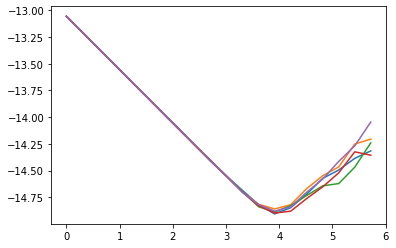

In [23]:
# calculate allan variance for 0 covariance
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(cov_0_data.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_0_data[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))

### 3. 计算Gamma

#### (1) For each 2 clocks calculate 

$ 1/M * \sum_{i=0}^{M}[\Delta y_{A}^{i}(\tau)\Delta y_{B}^{i}(\tau)] $

In [5]:
def rolling_diff(arr, tau = 1):
    # tau should be the power of 2
    # arr is a one-dimension array
    if tau >= len(arr):
        raise Exception('tau %s is bigger or equal than length of array %s ' % (tau, len(arr)))
    else:
        result = list()
        for i in range(len(arr)):
            if i + tau >= len(arr):
                break
            else:
                result.append(arr[i + tau] - arr[i])
        return np.array(result)

In [6]:
def cal_cij_and_plot(cov_data, taus):
    C_ij_all = list()
    for tau in taus:
        delta_clocks = np.apply_along_axis(func1d = rolling_diff, axis = 1, arr = cov_data, tau = tau)
        print('tau is %s and delta_clocks has shape %s' % (tau, str(delta_clocks.shape)))
        result = list()
        for i in range(delta_clocks.shape[0]):
            for j in range(delta_clocks.shape[0]):
                if i < j:
                    C_ij = np.mean(np.multiply(delta_clocks[i,], delta_clocks[j,]))
                    result.append(C_ij)
        C_ij_all.append(result)
    
    C_ij_all = np.array(C_ij_all)
    print(C_ij_all)
    print(C_ij_all.shape)
    
    for i in range(cov_data.shape[0]):
        for j in range(cov_data.shape[0]):
            if i < j:
                print("row1: %s, row2: %s" % (i, j))
                (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
                (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
                C_ij = C_ij_all[:,i+j-1]
                multiply_adev_ij = 2 * adevs_i * adevs_j
                Gamma_ij = C_ij / multiply_adev_ij
                print('Gamma_ij - %s' % Gamma_ij)
                print("----------------------------------------")
                plt.plot(np.log10(taus), Gamma_ij)
            else:
                continue

In [7]:
taus = 2 ** np.arange(0,20)

In [8]:
#cal_cij_and_plot(cov_0_data, taus)

In [9]:
#cal_cij_and_plot(cov_5_data, taus)

#### (2) For each 2 clocks calculate

C(i,j) = Var(i) + Var(j) - Var(i-j), Gamma(i,j) = C(i,j) / (2 * Std(i) * Std(j))

In [10]:
def cal_cij_and_plot2(cov_data):
    for i in range(cov_data.shape[0]):
        for j in range(cov_data.shape[0]):
            if i < j:
                print("row1: %s, row2: %s" % (i, j))
                (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
                (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
                (taus_ij, adevs_ij, errors_ij, ns_ij) = allantools.adev(data=cov_data[i,:] - cov_data[j,:], data_type='freq')
                assert taus_i.shape == taus_j.shape == taus_ij.shape
            
                C_ij = adevs_i ** 2 + adevs_j ** 2 - adevs_ij ** 2
                multiply_adev_ij = 2 * adevs_i * adevs_j
                Gamma_ij = C_ij / multiply_adev_ij
            
                print('tau - %s' % taus_ij)
                print('C_ij - %s' % C_ij)
                print('multiply_adev_ij - %s' % multiply_adev_ij)
                print('Gamma_ij - %s' % Gamma_ij)
                print("----------------------------------------")
                plt.plot(np.log10(taus_ij), Gamma_ij)
            else:
                continue

In [11]:
#cal_cij_and_plot2(cov_0_data)

In [12]:
#cal_cij_and_plot2(cov_5_data)

#### (3) For each 2 clocks calculate

In [13]:
# TODO

### 4. 带入模型进行测试

In [31]:
y_t = cov_0_data.T
clock_size = y_t.shape[1]

In [33]:
regularization = False
subset_size_list = [3, 5]
window_step_list = [60*60*12, 60*60*6, 60*60, 60*30, 60*10, 60*5]
amplify = [2, 2, 5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [4.17263302e-14 3.04952271e-14 2.12284952e-14 1.59050976e-14
 1.10175369e-14 7.28269180e-15 4.94322741e-15 3.31954743e-15
 2.84863772e-15 2.16134769e-15 2.33467227e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [3.85416301e-14 2.84199365e-14 1.93061654e-14 1.46822363e-14
 9.77277073e-15 7.03743348e-15 5.03844723e-15 3.44413763e-15
 2.50775151e-15 2.13736887e-15 2.57556212e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [4.09068381e-14 2.88109216e-14 2.11921152e-14 1.45380608e-14
 1.10414270e-14 7.64586390e-15 5.02433949e-15 3.14783680e-15
 2.3794735

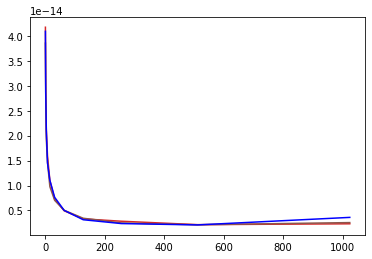

6000 600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [4.21862510e-14 2.99149610e-14 2.13685542e-14 1.50893078e-14
 1.00993351e-14 6.24398522e-15 5.24895678e-15 3.66231512e-15
 2.19480547e-15 1.76359847e-15 1.33972498e-15 1.03755932e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [3.88913677e-14 2.78810621e-14 1.97468445e-14 1.38567837e-14
 9.32135193e-15 6.22482860e-15 5.23108599e-15 3.57250898e-15
 2.00762483e-15 1.62450923e-15 1.49949063e-15 7.41247991e-16]
*** Inverse variance weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [4.18179520e-14 2.91021016e-14 2.07165853e-14 1.49837213e-14
 1

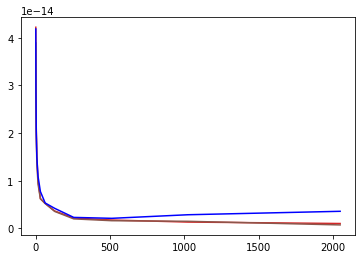

3000 300
Done


In [34]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((subset_size, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_cov_list = list()
            subset_raw_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(clock_size - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size, j:j+subset_size]
        
                # 5. Calculate covariance within the subset
                subset_cov = np.cov(subset_raw, rowvar=False)
                subset_cov_list.append(subset_cov)
#                 print("*** Subset Cov ***")
#                 print(subset_cov)
                
                # 6. Calculate summation for corresponding clocks in different subsets 
                subset_raw_list.append(subset_raw)

            # 7. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.sum(np.asarray(subset_cov_list), axis=0) / (clock_size - subset_size + 1)
#             print("*** Cov mean ***")
#             print(allset_cov_mean)
    
            # 8. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(subset_size)
#                 print("*** Regularization term ***")
#                 print(sigma * np.eye(subset_size))
    
            # 9. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#             print("*** Inverse Cov mean ***")
#             print(allset_cov_mean_inverse)
    
            # 10. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#             print("*** Weight ***")
#             print(weight)

            # 11. Calculate beamformer weighted clock
            subset_corresponding_sum = np.sum(subset_raw_list, axis=0).T
            Z = (np.dot(weight.T, subset_corresponding_sum) / (clock_size - subset_size + 1))[0]
#             print("*** Weighted output ***")
#             print(Z)
    
            # 12. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 13. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 14. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 15. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 16. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(taus, adevs, color=color)

    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus, adevs, errors, ns) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus, adevs))
    plt.plot(taus, adevs, color='blue')

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')